In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.shape

(10841, 13)

In [7]:
df.dropna(how ='any', inplace = True)

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df.shape

(9360, 13)

In [10]:
df.duplicated().sum()

474

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(8886, 13)

In [13]:
df[df['Price'] != '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,861k,100+,Paid,$0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [14]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
df['Size'] = df['Size'].str.replace('k', '')
df['Size'].str.contains('k', na=False).sum()

0

In [16]:
filtered_df = df[~(df['Size'].str.contains('Varies with device', na=False) | df['Size'].str.contains('M', na=False))]
def convert_kb_to_mb(size_str):
    if 'M' in size_str or 'Varies with device' in size_str:
        return size_str
    size_kb = float(size_str)
    size_mb = size_kb / 1024
    return size_mb
df.loc[filtered_df.index, 'Size'] = filtered_df['Size'].apply(convert_kb_to_mb)

In [17]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('M', '')
df['Size'] = df['Size'].astype(float)

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Reviews'] = df['Reviews'].astype(int)
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

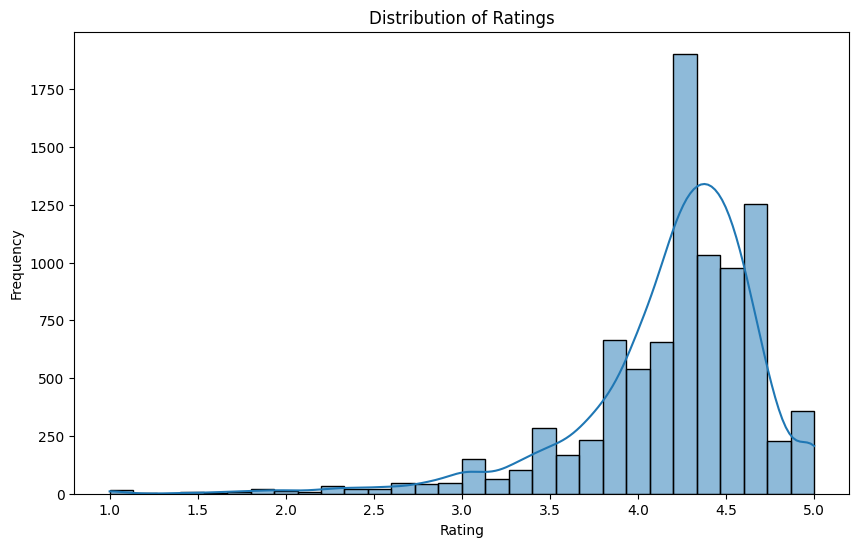

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

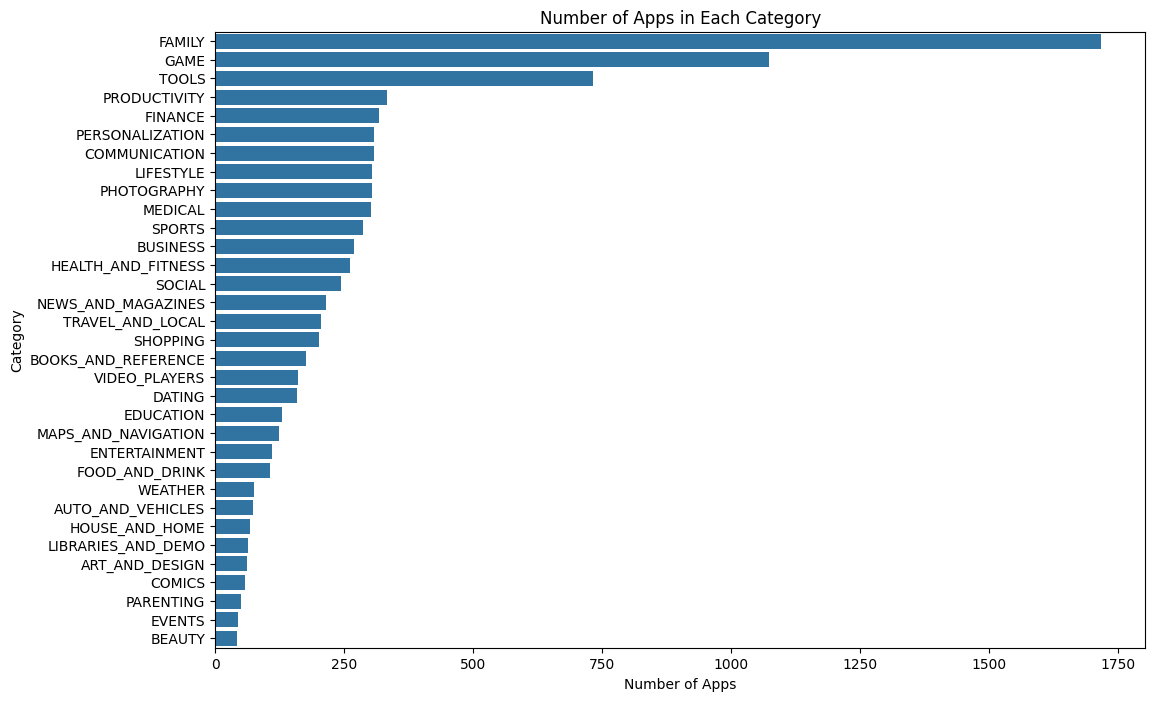

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Apps in Each Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

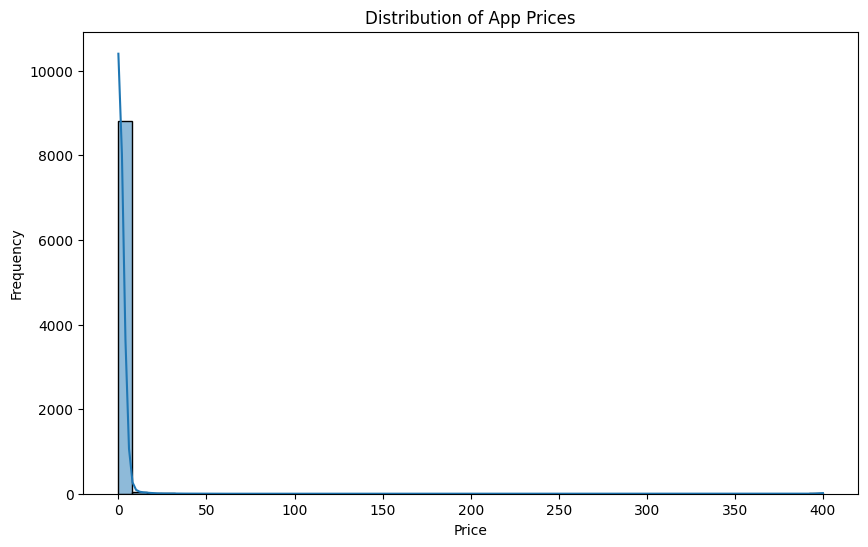

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

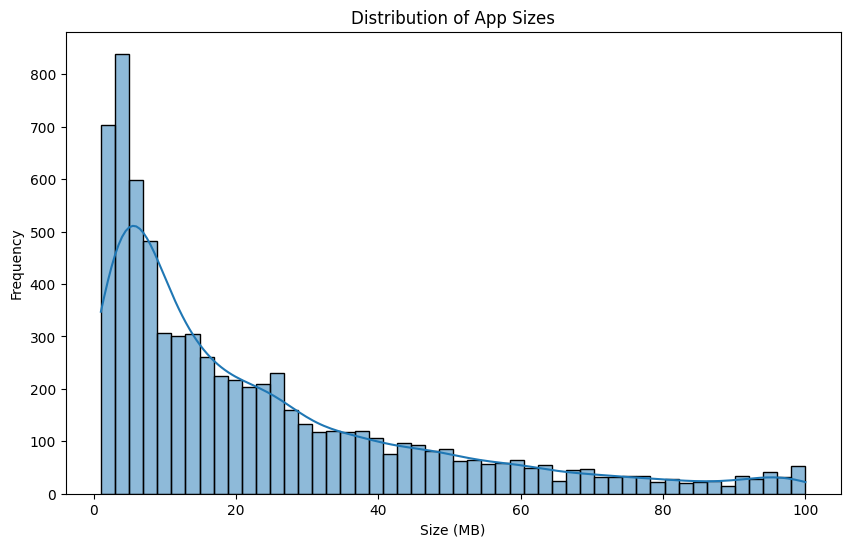

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Size'], bins=50, kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

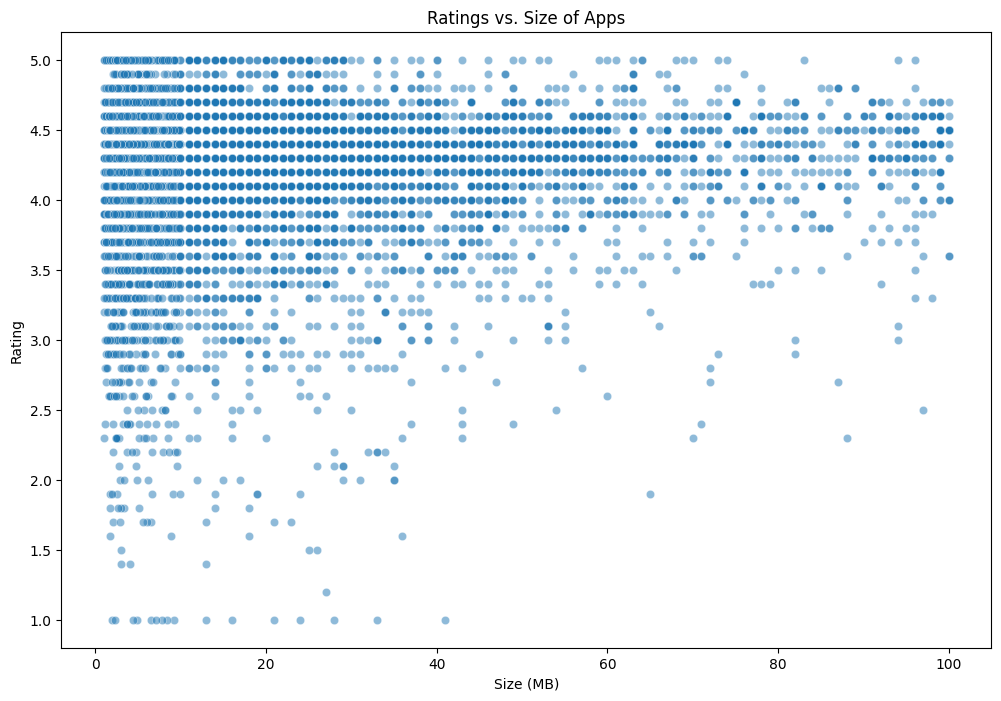

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.5)
plt.title('Ratings vs. Size of Apps')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

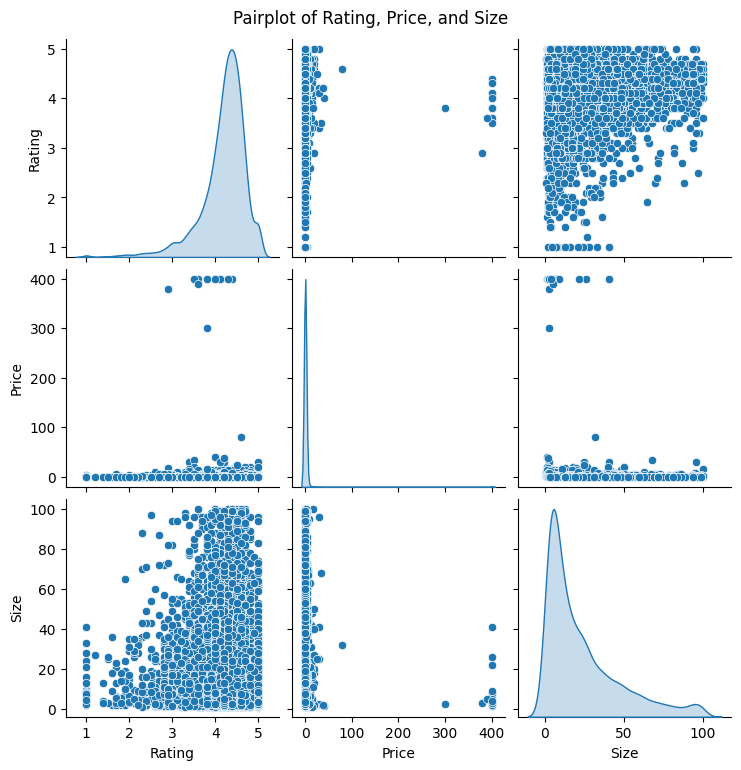

In [29]:
sns.pairplot(df[['Rating', 'Price', 'Size']], diag_kind='kde')
plt.suptitle('Pairplot of Rating, Price, and Size', y=1.02)
plt.show()

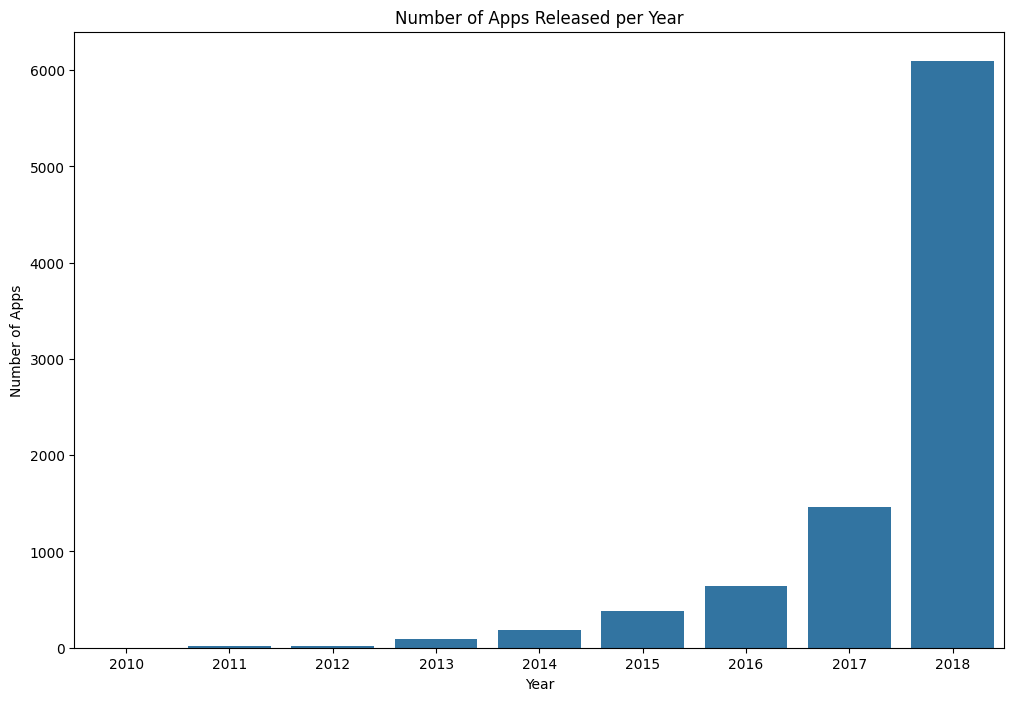

In [28]:
df['Year'] = df['Last Updated'].dt.year
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', data=df)
plt.title('Number of Apps Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.show()

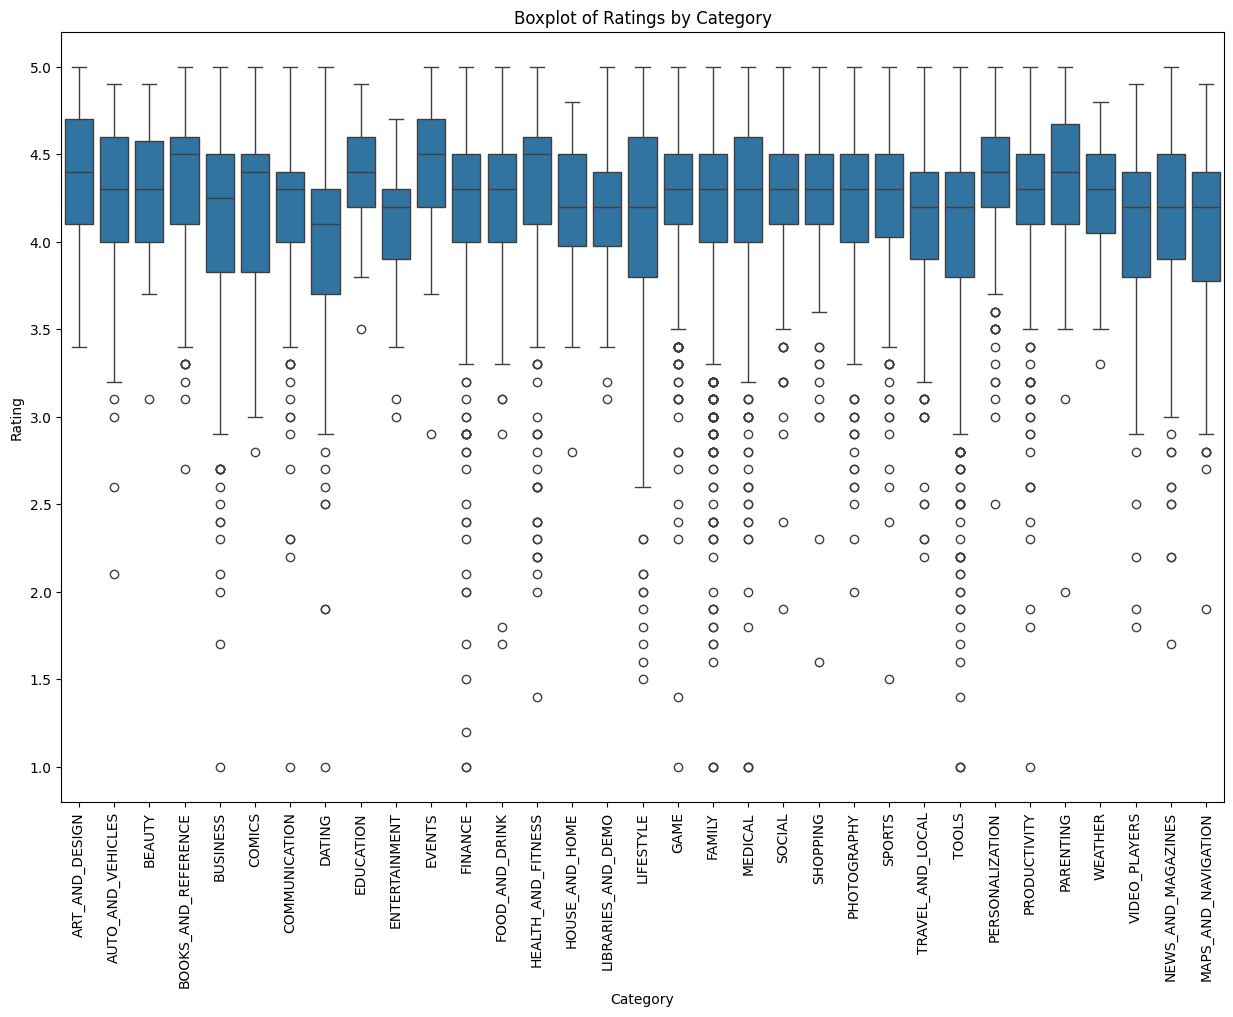

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

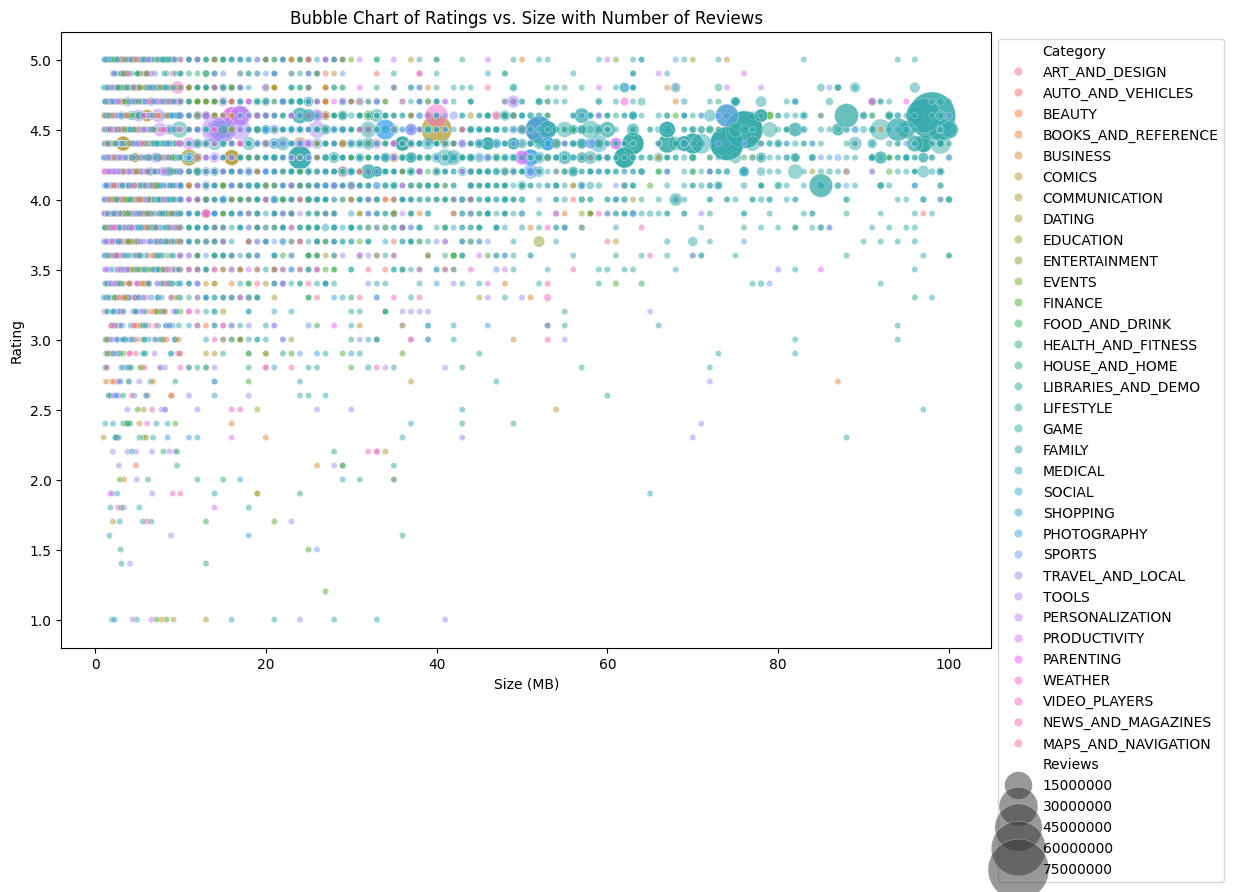

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Size', y='Rating', size='Reviews', hue='Category', sizes=(20, 2000), alpha=0.5, data=df)
plt.title('Bubble Chart of Ratings vs. Size with Number of Reviews')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()